## 목표: 
    - count예측하기
## 열의 의미
- datetime시간별 날짜
- season 1,2,3,4 봄여름가을겨율
- holiday 휴일인지 여부
- workingday	일하는 날인지 여부
- weather 1: 최상 4:최악
- temp 섭씨 온도
- atetemp 체감기온
- humidity 상대습도
- casual 미등록 사용자 대여수
- registered 등록된 사용자 대여수
- count 총 대여수

22년5월30일 시작 
<br>
EDA에 관한 코드임

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


train에 casual,registered,count가 추가로 있음

In [11]:
df_list=[train, test]
for i in df_list:
    print('---shape---')
    print(i.shape)
    print()
    print('---null---')
    print(i.isnull().sum())
    print('---null---')
    print(i.info())
    print('-' * 22)
    #null 값은 없다.

---shape---
(10886, 12)

---null---
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
---null---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
for i in df_list:
    print('-' * 22)
    print(sum(i.duplicated()))
    print()
#중복값 역시 없다.

----------------------
0

----------------------
0



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

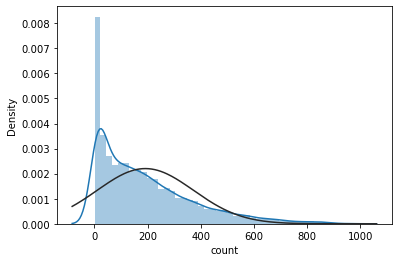

In [20]:
#타겟변수 확인
target=train['count']

from scipy import stats
from scipy.stats import norm

sns.distplot(train['count'], fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (169.82942673231383, 191.5741319125482, 0.9372682766213166))

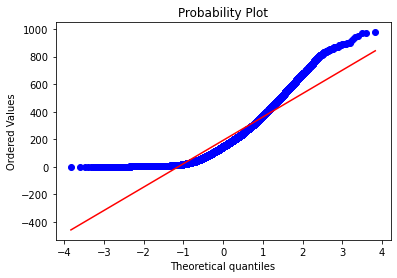

In [21]:
stats.probplot(train['count'],plot=plt)

왼쪽으로 치우쳐저 있기에 log나 root로 변환해보려한다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logCount', ylabel='Density'>

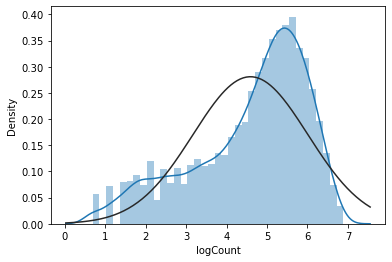

In [23]:
train['logCount']=np.log(target+1)

sns.distplot(train['logCount'], fit=norm)

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.364739645924417, 4.591363690454027, 0.9611793780126944))

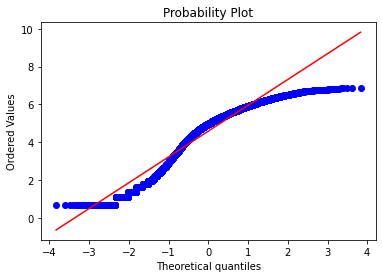

In [25]:
stats.probplot(train['logCount'],plot=plt)

In [32]:
featureNames=list(test)
df_train=train[featureNames]
df=pd.concat((df_train,test))

train.shape, test.shape, df.shape

((10886, 13), (6493, 9), (17379, 9))

datetime 조절

In [33]:
import datetime

tmp=pd.to_datetime(train['datetime'])

df['datetime']=pd.to_datetime(df['datetime'])
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['dayofweek']=df['datetime'].dt.dayofweek
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year
df['weekend']=(df['dayofweek']==5)|(df['dayofweek']==6)

df=df.drop(['datetime'],axis=1)

In [34]:
train['datetime']=pd.to_datetime(train['datetime'])
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['dayofweek']=train['datetime'].dt.dayofweek
train['month']=train['datetime'].dt.month
train['year']=train['datetime'].dt.year
train['weekend']=(train['dayofweek']==5)|(train['dayofweek']==6)


<AxesSubplot:xlabel='day', ylabel='count'>

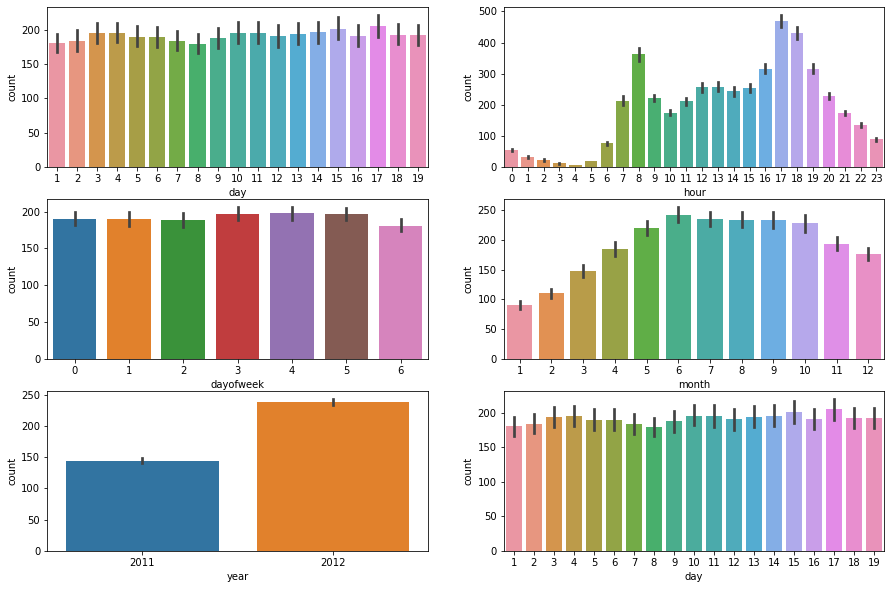

In [36]:
figure, axs=plt.subplots(3,2,figsize=(15,10))
sns.barplot(data=train, x='day', y=target,ax=axs[0][0])
sns.barplot(data=train, x='hour', y=target,ax=axs[0][1])
sns.barplot(data=train, x='dayofweek', y=target,ax=axs[1][0])
sns.barplot(data=train, x='month', y=target,ax=axs[1][1])
sns.barplot(data=train, x='year', y=target,ax=axs[2][0])
sns.barplot(data=train, x='day', y=target,ax=axs[2][1])

12년에 대여량이 증가
월별로 보면 여름에 대여향이 높은것으로 추정
시간대 별로는 출퇴근 시간에 많아 봉미
요일별 차이는 거의 없음